<a href="https://colab.research.google.com/github/faruxd/Beverages-Dataset-Analysis/blob/main/Beverage_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#loading dataset
df=pd.read_csv('/content/drive/MyDrive/synthetic_beverage_sales_data.csv')

In [ ]:
#checking dataset
df.head(10)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23
5,ORD2,CUS2847,B2C,Sauvignon Blanc,Alcoholic Beverages,9.09,2,0.00,18.18,Schleswig-Holstein,2023-03-16
6,ORD3,CUS1806,B2B,Tomato Juice,Juices,2.14,44,0.10,84.74,Hamburg,2022-11-20
7,ORD3,CUS1806,B2B,Vittel,Water,0.43,13,0.05,5.31,Hamburg,2022-11-20
8,ORD3,CUS1806,B2B,San Pellegrino,Water,1.21,92,0.10,100.19,Hamburg,2022-11-20
9,ORD3,CUS1806,B2B,Evian,Water,1.38,3,0.05,3.93,Hamburg,2022-11-20


In [ ]:
pd.options.display.float_format = '{:.2f}'.format #fixing the formatting

#pd.reset_option('display.float_format')  #to reset the formatting

In [ ]:
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8999910.00,8999910.00,8999910.00,8999910.00
mean,5.82,23.14,0.03,130.74
std,14.70,26.89,0.04,509.69
min,0.32,1.00,0.00,0.30
25%,1.05,6.00,0.00,8.40
50%,1.75,11.00,0.00,21.14
75%,3.21,30.00,0.05,69.49
max,169.53,100.00,0.15,14295.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [ ]:
df.shape #number of rows and colums

(8999910, 11)

In [ ]:
columns=df.columns #columns we have
print(columns)


Index(['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region',
       'Order_Date'],
      dtype='object')


In [ ]:
null_values=df.isnull().sum() #checking null values
print(null_values)

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


In [ ]:
#How many unique order IDs we have?
unique_order_ids=df['Order_ID'].nunique()
print(f'Unique Order IDs: {unique_order_ids}')

Unique Order IDs: 3000000


In [ ]:
#How many unique Customer IDs we have?
unique_cus_id=df['Customer_ID'].nunique()
print(f'Unique Customer IDs: {unique_cus_id}')

Unique Customer IDs: 10000


In [ ]:
# How many duplicate Order IDs we have?

duplicate_order_id=df['Order_ID'].duplicated().sum()
print(f'Duplicate Order IDs: {duplicate_order_id}')

Duplicate Order IDs: 5999910


In [ ]:
# How many duplicate Customer IDs we have?

duplicate_customer_id=df['Customer_ID'].duplicated().sum()
print(f'Duplicate customer ids: {duplicate_customer_id}')

Duplicate customer ids: 8989910


In [ ]:
# How many unique regions we have?

unique_regions=df['Region'].nunique()
print(f'Unique regions: {unique_regions}')

Unique regions: 16


Total Regions

In [ ]:
# Whice regions we have?
all_region=df['Region'].unique()
print(f'All regions: {all_region}')


All regions: ['Baden-Württemberg' 'Schleswig-Holstein' 'Hamburg' 'Bayern' 'Saarland'
 'Thüringen' 'Brandenburg' 'Nordrhein-Westfalen' 'Mecklenburg-Vorpommern'
 'Sachsen-Anhalt' 'Niedersachsen' 'Rheinland-Pfalz' 'Bremen' 'Sachsen'
 'Hessen' 'Berlin']


Total Categories


In [ ]:
#How many total categories of the products we have?
total_categories=df['Category'].nunique()
print(f'Total categories: {total_categories}')
all_categories=df['Category'].unique()
print(f'All categories: {all_categories}')

Total categories: 4
All categories: ['Water' 'Soft Drinks' 'Juices' 'Alcoholic Beverages']


Customer Types

In [ ]:
# How many Customer types are there?
customer_types=df['Customer_Type'].unique()
print(f'Customer types: {customer_types}')


Customer types: ['B2B' 'B2C']


Customer Distribution

Customer_Type
B2B    3563
B2C    6437
Name: Customer_ID, dtype: int64


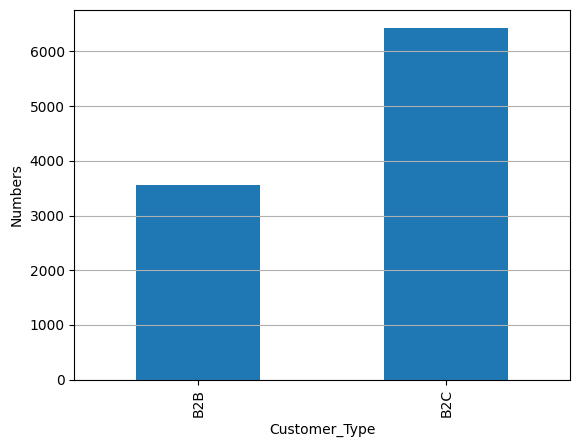

In [ ]:
# Customer Type Distribution
customer_type_distribution=df.groupby('Customer_Type')['Customer_ID'].nunique()
print(f'{customer_type_distribution}')
customer_type_distribution.plot(kind='bar',ylabel='Numbers')
plt.grid(True, axis='y')
plt.show()

Total Products

In [ ]:
# How many products we are selling?
products=df['Product'].nunique()
print(f'Products: {products}')

Products: 47


Categories Distribution

Category
Alcoholic Beverages    19
Soft Drinks            12
Water                   9
Juices                  7
Name: Product, dtype: int64


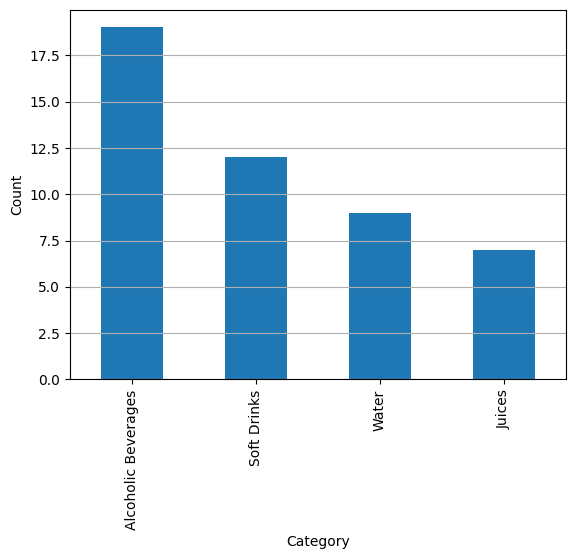

In [ ]:
# Grouping the products by categories
product_by_category=df.groupby('Category')['Product'].nunique().sort_values(ascending=False)
print(f'{product_by_category}')
product_by_category.plot(kind='bar', ylabel='Count')
plt.grid(True, axis='y')
plt.show()

Sales by Category

Category
Alcoholic Beverages   911.80
Juices                133.17
Soft Drinks            82.80
Water                  48.91
Name: Total_Price, dtype: float64


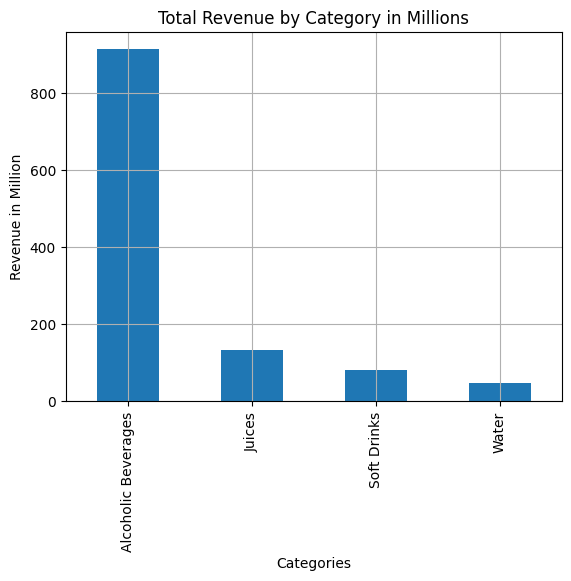

In [ ]:
# Total sales by Category
sales_over_category=df.groupby('Category')['Total_Price'].sum()
sales_over_category=sales_over_category/1e6 #converting revenue to million
print(f'{sales_over_category.sort_values(ascending=False)}')
sales_over_category.plot(kind='bar',title='Total Revenue by Category in Millions' ,xlabel='Categories', ylabel='Revenue in Million')
plt.grid(True)
plt.show()

The most revenue is generated by 'Alcoholic Beverages'

# Q1: Which beverage category is trending over the time period?

Category  Alcoholic Beverages  Juices  Soft Drinks  Water
Year                                                     
2021                    17.31   17.32        17.27  17.31
2022                    17.49   17.42        17.39  17.45
2023                    17.32   17.30        17.35  17.32


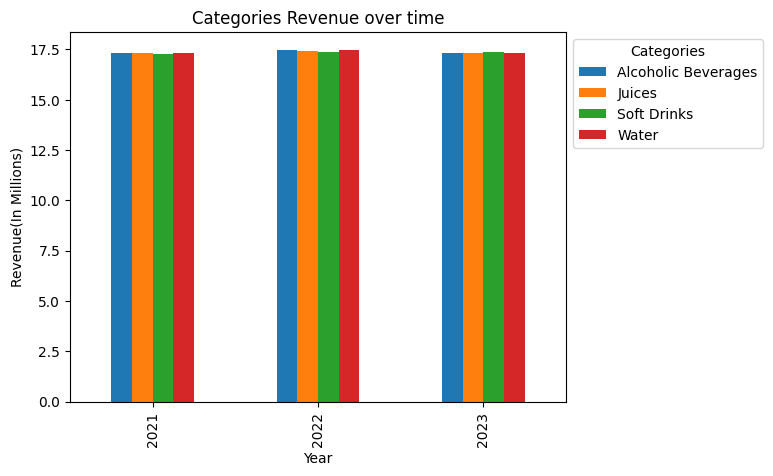

In [ ]:
#Category over Time
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df['Year']=df['Order_Date'].dt.year+
beverage_over_time= df.groupby(['Category','Year'])['Quantity'].sum().reset_index()
beverage_over_time=beverage_over_time.pivot(index='Year', columns='Category', values='Quantity')
beverage_over_time=beverage_over_time/1e6
print(beverage_over_time)
beverage_over_time=beverage_over_time.plot(kind='bar', title='Categories Revenue over time',ylabel='Revenue(In Millions)')
beverage_over_time.legend(title="Categories", loc="upper left", bbox_to_anchor=(1.0, 1.0))
plt.show()

*A closer look reveals distinct patterns*

*In 2021, **Juices** stood out as the top revenue-generating category.*

*In 2022, **Alcoholic** Beverages generated the highest revenue.*

*IN 2023, **Soft Drinks** was as most popular category than other*

#Q2: Which beverage product is more consumed in a particular region?


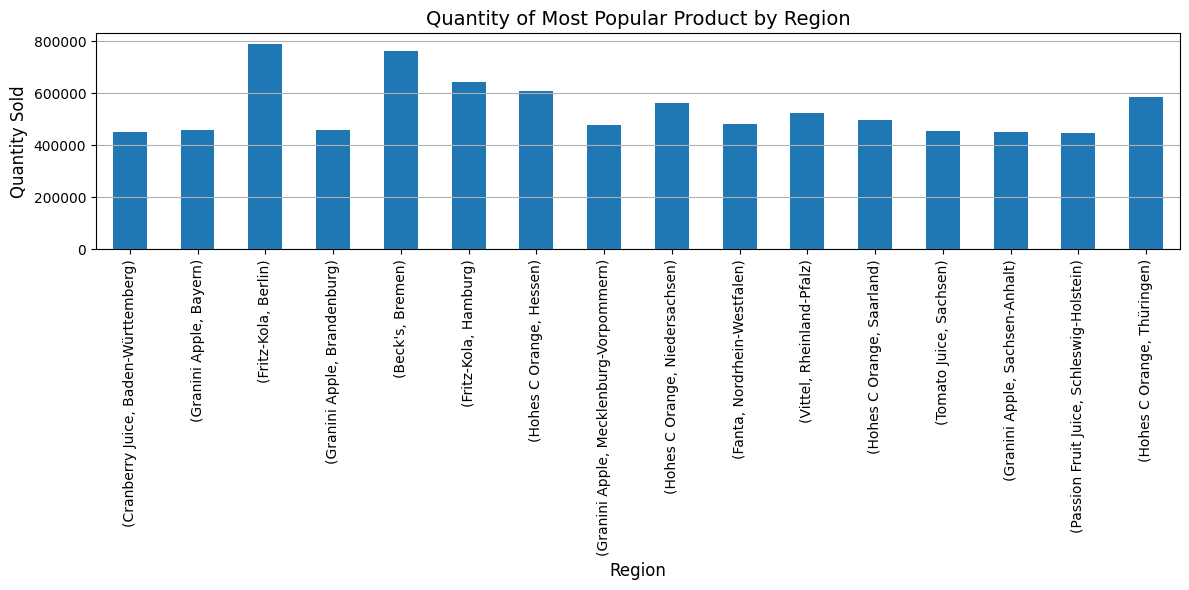

In [ ]:

product_by_region = df.groupby(['Product', 'Region'])['Quantity'].sum()
#print(product_by_region)
popular_product = product_by_region.groupby('Region').idxmax()
#print(popular_product)
popular_product_quantities = product_by_region[popular_product]
#print(popular_product_quantities)
popular_product_quantities.plot(kind='bar', figsize=(12, 6))

plt.title("Quantity of Most Popular Product by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

# Q3:Which products generate the highest revenue and least revenue?

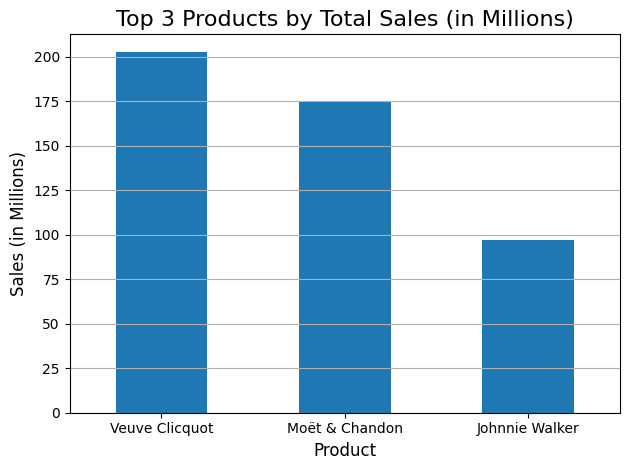

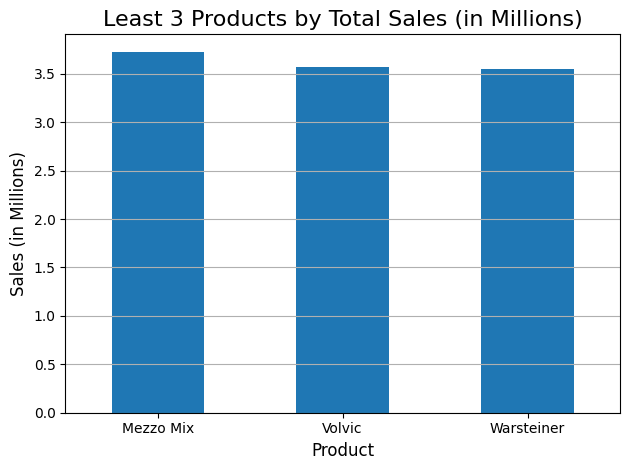

In [ ]:
product_trend_over_products=df.groupby('Product')['Total_Price'].sum()
product_trend_over_products=product_trend_over_products/1e6
#top 3 products
product_trend_over_products=product_trend_over_products.sort_values(ascending=False)
top_3_products=product_trend_over_products.head(3)
top_3_products.plot(kind='bar')
plt.title('Top 3 Products by Total Sales (in Millions)', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Sales (in Millions)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()
print('\n')

#least 3 products
least_3_products=product_trend_over_products.tail(3)
least_3_products.plot(kind='bar')
plt.title('Least 3 Products by Total Sales (in Millions)', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Sales (in Millions)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


*The top 3 sold products are:*

**Veuve Clicquot**

**Moet & Chandon**

**Johnnie walker**

*The least 3 sold products are *

**Mezzo Mix**

**Volvic**

**Warsteiner**



# Q4: Which products were consumed the most and which were consumed the least?

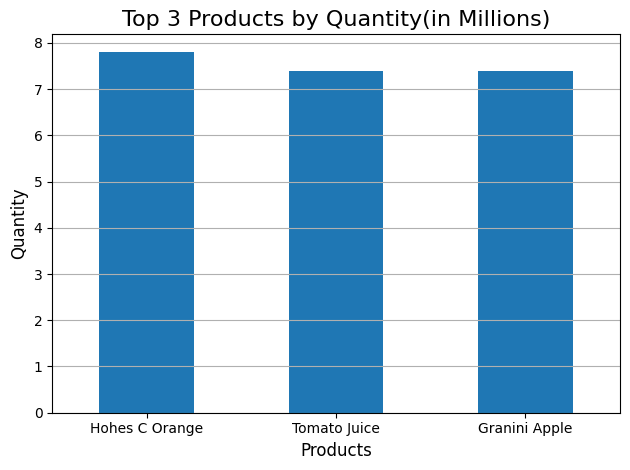

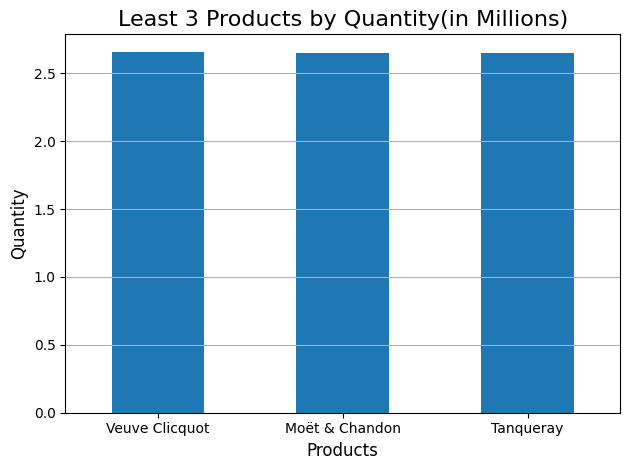

In [ ]:
product_trend_over_products=df.groupby('Product')['Quantity'].sum()
product_trend_over_products=product_trend_over_products/1e6
#top 3 products
product_trend_over_products=product_trend_over_products.sort_values(ascending=False)
top_3_products=product_trend_over_products.head(3)
top_3_products.plot(kind='bar')
plt.title('Top 3 Products by Quantity(in Millions)', fontsize=16)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()
print('\n')

#least 3 products
least_3_products=product_trend_over_products.tail(3)
least_3_products.plot(kind='bar')
plt.title('Least 3 Products by Quantity(in Millions)', fontsize=16)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


*The top 3 Consumed products are:*

**Hohes C Orange**

**Tomato Juice**

**Granini Apple**

*The least 3 Consumed products are:*

**Veuve Clicquot**

**Moet & Chandon**

**Tanqueray**


# Q5: How were the top 3 beverage products consumed over time in 2021, 2022, and 2023

<ipython-input-45-8b4abba7e817>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


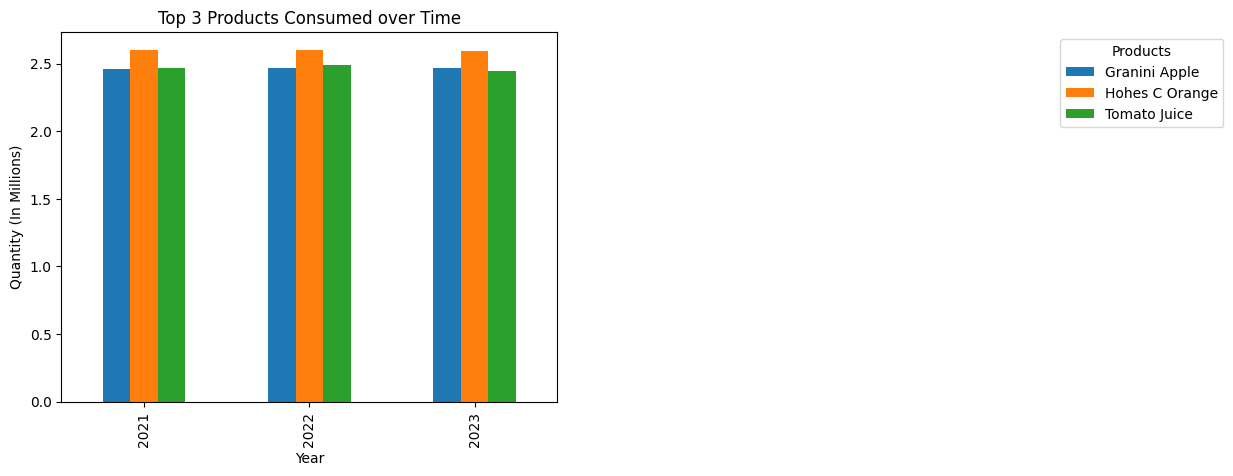

In [ ]:

#Product over Time
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Year'] = df['Order_Date'].dt.year
product_over_time = df.groupby(['Product', 'Year'])['Quantity'].sum()
# Sorting
total_quantity_per_product = product_over_time.groupby('Product').sum()  # Sum over all years
top_3_products = total_quantity_per_product.sort_values(ascending=False).head(3).index
# Filtering
top_3_product_data = product_over_time[product_over_time.index.get_level_values('Product').isin(top_3_products)]
top_3_product_data = top_3_product_data.reset_index()
# Pivot the data
top_3_product_data = top_3_product_data.pivot(index='Year', columns='Product', values='Quantity')
top_3_product_data = top_3_product_data / 1e6

top_3_product_data.plot(kind='bar', title='Top 3 Products Consumed over Time', ylabel='Quantity (In Millions)')
plt.legend(title="Products", loc="upper left", bbox_to_anchor=(2.0, 1.0))
plt.tight_layout()
plt.show()


The top 3 products – **Granini Apple, Hohes C Orange, and Tomato Juice** – have maintained consistent demand from 2021 to 2023.

However the most consumed product was Hohes C Orange

#Q6: Does giving discounts increase the sale of a product?

In [ ]:
# How many products are discounted?
products_with_discount=df[df['Discount']> 0]['Product']
print(f'Discounted Products: {products_with_discount.count()}')

# How many products are not discounted?
products_without_discount=df[df['Discount'] == 0]['Product']
print(f'Products with no Discounts: {products_without_discount.count()}')

# Total revenue of discounted Price
products_with_discount=df[df['Discount']> 0][['Product','Total_Price']]
total_revenue_discounted=products_with_discount['Total_Price'].sum()
total_revenue_discounted=total_revenue_discounted/1e6
print(f'The total revenue by discounted Products in Millions: {int(total_revenue_discounted)}')
# Total revenue of not discounted Price
products_with_no_discount=df[df['Discount']== 0][['Product','Total_Price']]
total_revenue_no_discounted=products_with_no_discount['Total_Price'].sum()
total_revenue_no_discounted=total_revenue_no_discounted/1e6
print(f'The total revenue by not discounted Products in Millions: {int(total_revenue_no_discounted)}')

rev_diff=total_revenue_discounted-total_revenue_no_discounted
print(f'The revenue difference is {int(abs(rev_diff))}')

Discounted Products: 3204505
Products with no Discounts: 5795405
The total revenue by discounted Products in Millions: 901
The total revenue by not discounted Products in Millions: 275
The revenue difference is 626


#Q7: What is the total revenue over a particular region?

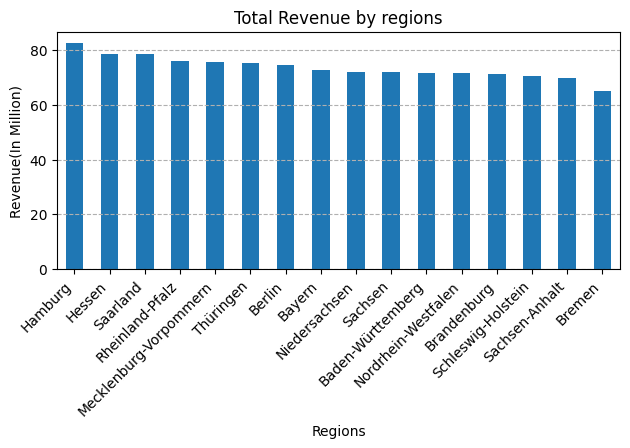

In [ ]:
#Total Price by regions

total_price_by_region=df.groupby('Region')['Total_Price'].sum()
sorted_region=total_price_by_region.sort_values(ascending=False)
sorted_region=sorted_region/1e6

sorted_region.plot(kind='bar',ylabel=' ')
plt.tight_layout()
plt.grid(True, axis='y',linestyle='--')
plt.ylabel('Revenue(In Million)')
plt.xlabel('Regions')
plt.xticks(rotation=45, ha='right')
plt.title('Total Revenue by regions')
plt.show()

**Hamburg, Hessen, and Saarland** have the highest total revenue, while
**Bremen, Sachsen-Anhalt, and Brandenburg** have the lowest.

#Q8: At which month beverages are consumed the most over time?

Most Beverages are consumed in following month
Order_Date
1    17.62
2    15.97
3    17.77
4    17.05
5    17.73
6    17.22
7    17.70
8    17.69
9    17.14
10   17.75
11   17.16
12   17.44
Name: Quantity, dtype: float64


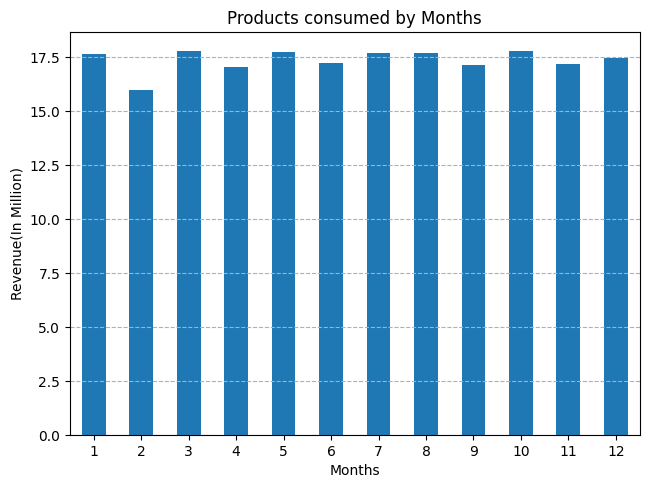

In [ ]:
# Total sales by Months
df['Order_Date']=pd.to_datetime(df['Order_Date'])
product_trend_over_type=df.groupby(df['Order_Date'].dt.month)['Quantity'].sum()
product_trend_over_type=product_trend_over_type/1e6
#product_trend_over_type=product_trend_over_type.sort_values(ascending=False)
print(f'Most Beverages are consumed in following month')
print(f'{product_trend_over_type}')

product_trend_over_type.plot(kind='bar')
plt.tight_layout()
plt.grid(True, axis='y',linestyle='--')
plt.ylabel('Revenue(In Million)')
plt.xlabel('Months')
plt.xticks(rotation=0)
plt.title('Products consumed by Months')
plt.show()


The products consumption was almost the same in each month but people were consuming less products in Feburary and higher in March.

#Q9: Which products vary in customer types(B2B,B2C)?

Product
Hohes C Orange   6.05
Tomato Juice     5.76
Granini Apple    5.74
Name: Quantity, dtype: float64


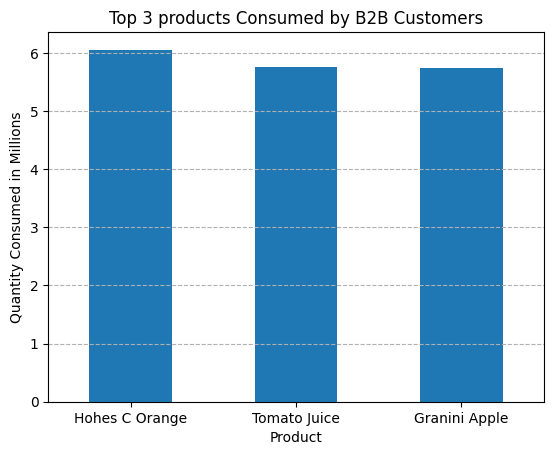

Product
Hohes C Orange       1.74
Granini Apple        1.65
Rauch Multivitamin   1.64
Name: Quantity, dtype: float64


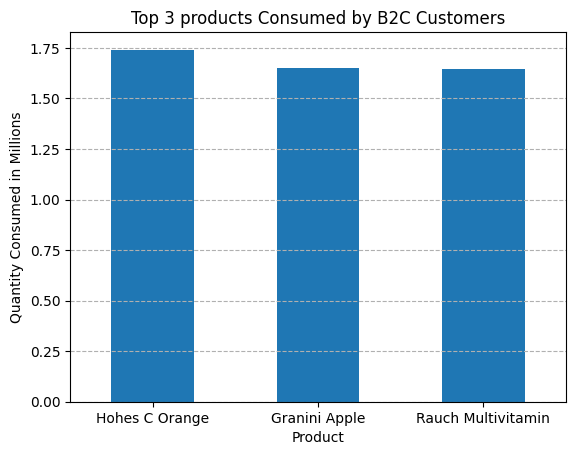

In [ ]:
#Top 3 products consumed by B2B Customers
product_by_cus_type1=df[df['Customer_Type']=='B2B']
product_by_cus_type1=product_by_cus_type1.groupby('Product')['Quantity'].sum()
product_by_cus_type1=product_by_cus_type1/1e6
product_by_cus_type1=product_by_cus_type1.sort_values(ascending=False)
product_by_cus_type1=product_by_cus_type1.head(3)
print(product_by_cus_type1)
product_by_cus_type1.plot(kind='bar')
plt.title('Top 3 products Consumed by B2B Customers')
plt.ylabel('Quantity Consumed in Millions')
plt.grid(True, axis='y', linestyle='--')
plt.xticks(rotation=0)
plt.show()

#Top 3 products consumed by B2C Customers
product_by_cus_type2=df[df['Customer_Type']=='B2C']
product_by_cus_type2=product_by_cus_type2.groupby('Product')['Quantity'].sum()
product_by_cus_type2=product_by_cus_type2/1e6
product_by_cus_type2=product_by_cus_type2.sort_values(ascending=False)
product_by_cus_type2=product_by_cus_type2.head(3)
print(product_by_cus_type2)
product_by_cus_type2.plot(kind='bar')
plt.title('Top 3 products Consumed by B2C Customers')
plt.ylabel('Quantity Consumed in Millions')
plt.grid(True, axis='y', linestyle='--')
plt.xticks(rotation=0)
plt.show()

B2B Customer mostly consume

*   **Hohes C Orange**
*   **Tomato Juice**
*   **Granini Apple**



B2C Customer mostly consume

*   **Hohes C Orange**
*   **Granini Apple**
*   **Rauch Multivitamin**






#Q10: Which category or product is sold at the least price and comsumed at least quantity?

In [ ]:
# Least Comsumed category
most_sold_category_over_time = df.groupby('Category')['Quantity'].sum()
most_sold_category_over_time=most_sold_category_over_time.sort_values(ascending=False)
most_sold_category_over_time=most_sold_category_over_time/1e6
print("Least Comsumed category is")
print(most_sold_category_over_time.tail(1))

print ('\n')
# Least sold category
lease_sold_category_over_time = df.groupby('Category')['Total_Price'].sum()
lease_sold_category_over_time=lease_sold_category_over_time.sort_values(ascending=False)
lease_sold_category_over_time=lease_sold_category_over_time/1e6
print("Least Revenue Category is")
print(lease_sold_category_over_time.tail(1))


print ('\n')

# Least consumed Product
most_sold_product_over_time = df.groupby('Product')['Quantity'].sum()
most_sold_product_over_time=most_sold_product_over_time.sort_values(ascending=False)
most_sold_product_over_time=most_sold_product_over_time/1e6
print("Least Consumed Product is")
print(most_sold_product_over_time.tail(1))

print ('\n')
# Least sold Product
lease_sold_category_over_time = df.groupby('Product')['Total_Price'].sum()
lease_sold_category_over_time=lease_sold_category_over_time.sort_values(ascending=False)
lease_sold_category_over_time=lease_sold_category_over_time/1e6
print("Least Reveue Product is")
print(lease_sold_category_over_time.tail(1))

Least Comsumed category is
Category
Soft Drinks   52.00
Name: Quantity, dtype: float64


Least Revenue Category is
Category
Water   48.91
Name: Total_Price, dtype: float64


Least Consumed Product is
Product
Tanqueray   2.65
Name: Quantity, dtype: float64


Least Reveue Product is
Product
Warsteiner   3.55
Name: Total_Price, dtype: float64


# **Takeaways Summary**
The analysis involved data on 10,000 unique customers, 3,000,000 unique order IDs, and operations across 16 regions in Germany. There are 4 product categories: Water, Soft Drinks, Juices, and Alcoholic Beverages, with a total of 47 products. Among these, Alcoholic Beverages generated the highest revenue overall, followed by Juices and Soft Drinks.

**Key insights:**

Revenue Patterns:
2021: Juices brought the most revenue.
2022: Alcoholic Beverages took the lead.
2023: Soft Drinks became the most popular.
Top 3 products sold: Veuve Clicquot, Moet & Chandon, Johnnie Walker.
Least sold products: Mezzo Mix, Volvic, Warsteiner.
Top consumed products: Hohes C Orange, Tomato Juice, Granini Apple.
Least consumed products: Veuve Clicquot, Moet & Chandon, Tanqueray.
Discounted products (3.2M) generated significantly more revenue ($901M) than non-discounted products (5.7M units, $275M), with a revenue difference of $626M.

Regions like Hamburg, Hessen, and Saarland contributed the most revenue, while Bremen, Sachsen-Anhalt, and Brandenburg contributed the least. Consumption varied little by month but was lower in February and peaked in March.

**Customer trends:**

B2B customers favored Hohes C Orange, Tomato Juice, and Granini Apple.
B2C customers preferred Hohes C Orange, Granini Apple, and Rauch Multivitamin.
Lastly, the least consumed category was Soft Drinks, while Water had the least revenue. Among products, Tanqueray was the least consumed, and Warsteiner generated the least revenue.